In [ ]:
import math
import seaborn as sns
import pandas as pd

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
# 파일 불러오기
df = pd.read_csv("/content/abalone.csv")
# Age = Rings / 1.5 -> Age 열 추가
df['Age'] = round(df['Rings'] / 1.5, 2)

# 순서형 변수 'Sex' label encoding
df['Sex'].replace({'M': 0, 'F': 0, 'I': 1}, inplace=True)


In [ ]:
# 독립 변수와 종속 변수 설정
X = df.drop(['Age', 'Rings'],axis=1)
y = df['Age']

# train set/test set 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
x = X_train.to_numpy()
xtx = np.matmul(x.T , x)
xtx_inv = np.linalg.inv(xtx)

W = np.matmul(np.matmul(xtx_inv , x.T), y_train)
W

array([ -0.26131834,   6.14259573,   7.26500836,   8.77648393,
         6.43174984, -15.20637798,  -8.39133527,   3.87976682])

In [ ]:
#Calculate SSE
predicted_y_train = np.matmul(X_train.to_numpy(), W)
residuals = (y_train- predicted_y_train)
#MSE in training data
(residuals*residuals).mean()

2.233416579538403

In [ ]:
#predict test data
predicted_y_test = np.matmul(X_test.to_numpy(), W)
residuals_test = (y_test - predicted_y_test)
#MSE in test data
(residuals_test*residuals_test).mean()

2.243715420560538

In [ ]:
# 모델 초기화 및 학습
model = LinearRegression()
model.fit(X_train, y_train)
# 학습한 weight 확인
print(model.coef_)
# 학습 데이터 예측 및 테스트 데이터에 대한 예측
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# Training data 성능 계산
print('MSE score in Training data : ', mean_squared_error(y_train_pred,y_train))
print('R2 in Training data : ', r2_score(y_train_pred,y_train))
# Test data 성능 계산
print('MSE score in Test data : ', mean_squared_error(y_test_pred,y_test))
print('R2 in Test data : ', r2_score(y_test_pred,y_test))

[ -0.52293259   0.47331517   6.74054929   6.72494219   6.6451506
 -14.30669751  -7.17411201   5.30594098]
MSE score in Training data :  2.1432560555291493
R2 in Training data :  0.14854860975735507
MSE score in Test data :  2.1251720529199467
R2 in Test data :  0.19215300391025147


Pearson correlation coefficient matrix of each variables:



<ipython-input-207-7efff0132953>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


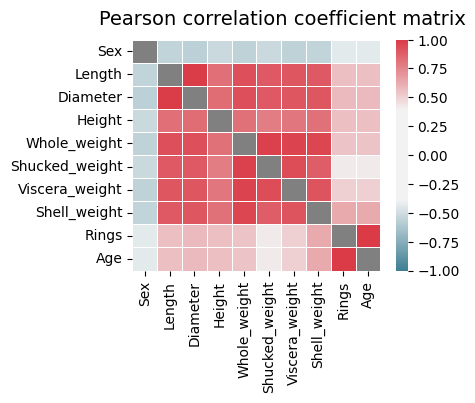

In [ ]:
#히트맵을 이용하여 예측변수 간의 상관관계가 있는지 확인.
corr = df.corr()
print('Pearson correlation coefficient matrix of each variables:\n')

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)


In [ ]:
#예측변수 사이에 너무 큰 상관관계(공선성)이 있음을 분산팽창요인을 통해 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [round(variance_inflation_factor(df.values, i), 3) for i in range(len(df.columns))]
vif_data

# 예측 변수 간에 너무 큰 상관관계가 있음을 지표로 파악함. 따라서

,feature,VIF
0,Sex,1.975
1,Length,730.235
2,Diameter,762.129
3,Height,43.009
4,Whole_weight,436.619
5,Shucked_weight,117.471
6,Viscera_weight,65.434
7,Shell_weight,82.528
8,Rings,6559081.350
9,Age,6559260.248


In [ ]:
from sklearn.linear_model import Ridge
import sklearn.metrics as mt

ridge = Ridge(alpha=1000.0)
ridge.fit(X_train, y_train)
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

print("Ridge : " ,ridge.coef_)
print("Ridge r2 : ", mt.r2_score(y_test, y_test_pred_ridge))

# 0에 가까운 변수들 제거

Ridge :  [ 0.         -0.52190621  0.20392146  0.17778109  0.07975405  0.74505302
  0.18282313  0.14593091  0.30221497]
Ridge r2 :  0.2709382980480681


In [ ]:
#Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Lasso : ",lasso.coef_)
print("Ridge r2 : ", mt.r2_score(y_test, y_test_pred_ridge))

# 0에 가까운 변수들 제거

Lasso :  [ 0.         -0.51850943  0.          0.          0.          1.66583026
 -0.          0.          0.        ]
Ridge r2 :  0.2709382980480681


In [ ]:
# Height, Shucked_weight 변수만 남기고 드랍.
df_cut = pd.DataFrame(df[['Length', 'Shucked_weight']])

vif_data = pd.DataFrame()
vif_data['feature'] = df_cut.columns
vif_data['VIF'] = [round(variance_inflation_factor(df_cut.values, i), 3) for i in range(len(df_cut.columns))]
vif_data

#vif가 10이하로 공선성이 사라진 것을 확인할 수 있음.

,feature,VIF
0,Length,7.917
1,Shucked_weight,7.917


In [ ]:
# 변수 삭제 후 새로운 데이터셋을 이용해 linear regression 모델 구축
X_cut = pd.DataFrame(df[['Length',  'Shucked_weight']])
y_cut = df['Rings']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_cut, y_cut, test_size=0.2, random_state=10)

X_train1 = sm.add_constant(X_train1)
X_test1 = sm.add_constant(X_test1)

model_train = sm.OLS(y_train1, X_train1).fit()
model_test = sm.OLS(y_test1, X_test1).fit()

print('MSE score in Training data : ', model_train.mse_resid)
print('R2 in Training data : ', model_train.rsquared)

print('MSE score in Test data : ', model_test.mse_resid)
print('R2 in Test data : ', model_test.rsquared)

#r2 값 향상된것을 확인할 수 있다.

MSE score in Training data :  6.994385148125336
R2 in Training data :  0.3353576852819069
MSE score in Test data :  6.243154388748726
R2 in Test data :  0.37182261080958356


In [ ]:
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     842.1
Date:                Fri, 01 Dec 2023   Prob (F-statistic):          7.93e-297
Time:                        07:51:41   Log-Likelihood:                -7988.5
No. Observations:                3341   AIC:                         1.598e+04
Df Residuals:                    3338   BIC:                         1.600e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.8592      0.318     -2.699      0.007      -1.484      -0.235
Length            24.5207      0.876     28.002      0.000      22.804      26.238
Shucked_weight    -5.7064      0.473    -12.058      0.000      -6.634      -4.778
==============================================================================
Omnibus:                     1117.189   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3831.750
Skew:                           1.673   Prob(JB):                         0.00
Kurtosis:                       7.041   Cond. No.                         26.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""